<a href="https://colab.research.google.com/github/Ailar-Taghavi/Big-data-project/blob/main/Copy_of_Ailar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **CIND-119 - Final group project - Credit Card Datasetold text**

# The aim of the project:
This dataset addresses the challenge of a bank in deciding on loan approval to customers. A
bank needs to make the right decision in determining who should get the approval and who should not.
# Summary of Dataset:
The German Credit dataset contains 1001 rows and 20 attributes, and the class attribute (Creditability) shows a good or a
bad credit risk. we will need to develop a data analytics-based strategy for the bank managers that can help
them in making a decision about loan approval for the prospective applicants/customers.
# tools of ML methods:
Two predictive models were developed using the prepared dataset: the Decision tree and Naïve Bayes approach. Both models were evaluated based on avalabble metrics.

## Upload the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="german_credit.arff"
data = arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')

## Look at the attribute type. e.g., nominal, ordinal or quantitative.


In [ ]:
print(df.dtypes)

Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


In [ ]:
import pandas as pd
data = {"FeatureName": df.columns.tolist(),
    "Type": ["Nominal", "Ordinal", "Quantitative", "Ordinal", "Nominal","Quantitative", "Ordinal", "Ordinal", "Quantitative", "Nominal",
        "Nominal", "Ordinal", "Nominal", "Quantitative", "Nominal",  "Nominal", "Quantitative", "Nominal", "Quantitative", "Nominal", "Nominal"]
}
df_type = pd.DataFrame(data)
print(df_type)



                          FeatureName          Type
0                       Creditability       Nominal
1                     Account Balance       Ordinal
2          Duration of Credit (month)  Quantitative
3   Payment Status of Previous Credit       Ordinal
4                             Purpose       Nominal
5                       Credit Amount  Quantitative
6                Value Savings/Stocks       Ordinal
7        Length of current employment       Ordinal
8                 Instalment per cent  Quantitative
9                Sex & Marital Status       Nominal
10                         Guarantors       Nominal
11        Duration in Current address       Ordinal
12      Most valuable available asset       Nominal
13                        Age (years)  Quantitative
14                 Concurrent Credits       Nominal
15                  Type of apartment       Nominal
16         No of Credits at this Bank  Quantitative
17                         Occupation       Nominal
18          

In [ ]:
df.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18.0,4,2,1049.0,1,2,4.0,2,...,4,2,21.0,3,1,1.0,3,1.0,1,1
1,1,1,9.0,4,0,2799.0,1,3,2.0,3,...,2,1,36.0,3,1,2.0,3,2.0,1,1
2,1,2,12.0,2,9,841.0,2,4,2.0,2,...,4,1,23.0,3,1,1.0,2,1.0,1,1
3,1,1,12.0,4,0,2122.0,1,3,3.0,3,...,2,1,39.0,3,1,2.0,2,2.0,1,2
4,1,1,12.0,4,0,2171.0,1,3,4.0,3,...,4,2,38.0,1,2,2.0,2,1.0,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

## Find max, min, mean and standard deviation of attributes.

In [ ]:
df.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,35.54200,1.407000,1.155000
std,12.058814,2822.75176,1.118715,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2319.50000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3972.25000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,75.00000,4.000000,2.000000


## Detect missing data

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


## Detect duplicate rows

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Explore the correlation between attributes

it showes that the "account balance" and "Payment Status of Previous Credit" are the most correlated attribute to "creditability".

In [ ]:
corr_matrix=df.corr()
corr_matrix["Creditability"]

,Creditability
Creditability,1.000000
Account Balance,0.350847
Duration of Credit (month),-0.214927
Payment Status of Previous Credit,0.228785
Purpose,-0.017979
Credit Amount,-0.154740
Value Savings/Stocks,0.178943
Length of current employment,0.116002
Instalment per cent,-0.072404
Sex & Marital Status,0.088184


# Plot of the most correlated feature

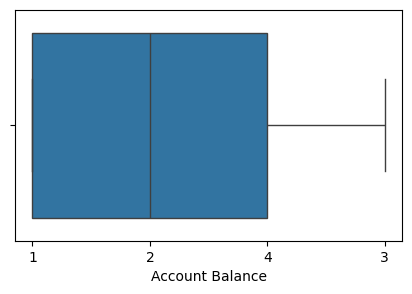

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Account Balance'])
plt.show()

<Axes: xlabel='Account Balance', ylabel='count'>

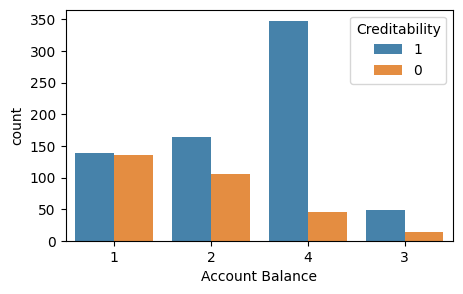

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(x=df['Account Balance'], hue=df['Creditability'], alpha=0.9)

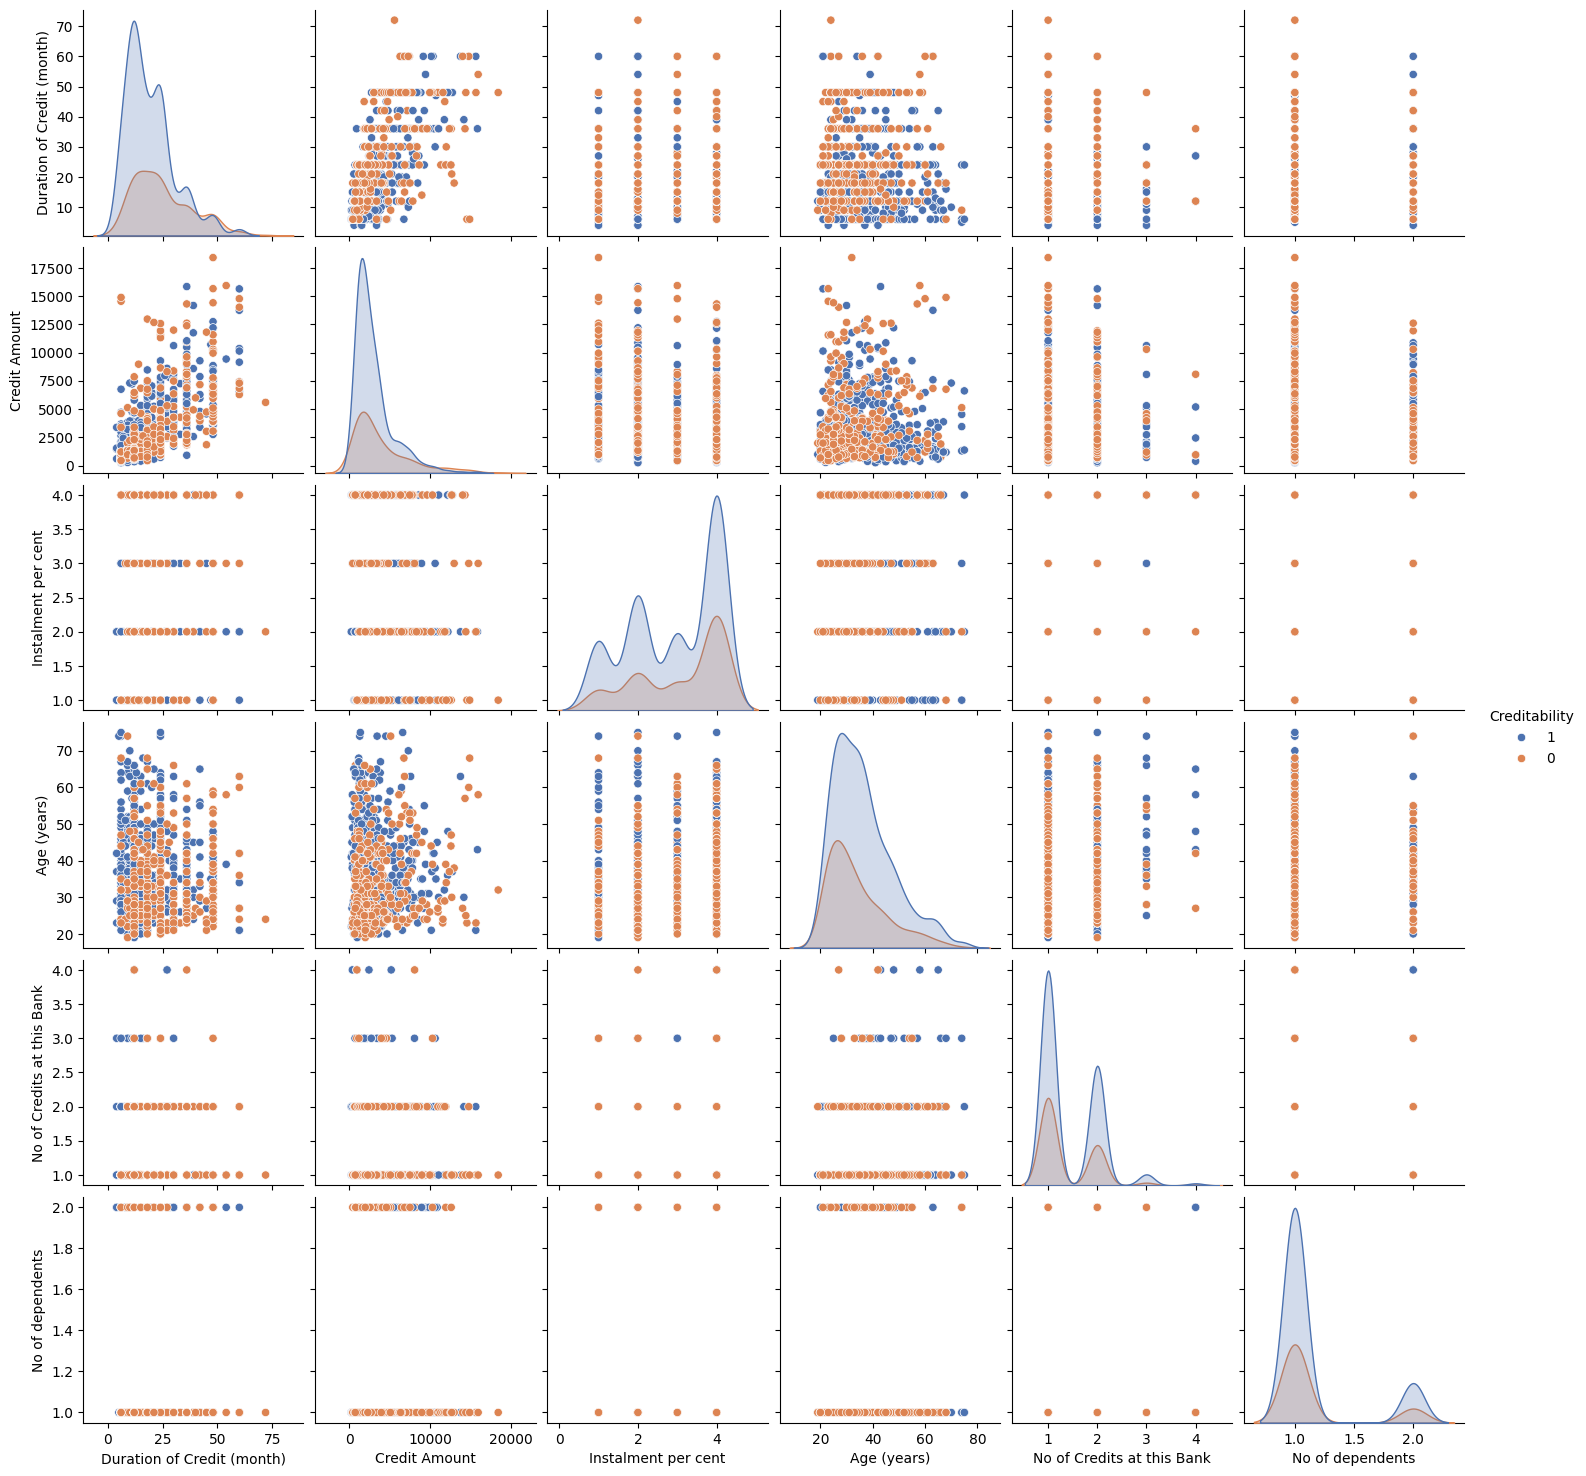

In [ ]:
sns.pairplot(df, hue="Creditability", palette="deep")

## Normalizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_names= df.columns[df.columns != class_col_name ]
data_x_norm = scaler.fit_transform(df.loc[:, feature_names])

In [ ]:
x = pd.DataFrame(data=data_x_norm, columns= feature_names)
y=df['Creditability']
x.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,1.046987,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,-0.428290,-0.823318,-0.196014
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,-0.765977,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,2.334869,-0.823318,-0.196014
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,1.046987,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,-0.428290,-0.823318,-0.196014
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,-0.765977,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,2.334869,-0.823318,5.101669
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,1.046987,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,-0.428290,-0.823318,5.101669


As the Multinomial Naive Bayes classifier (MultinomialNB) from the scikit-learn library requires non-negative feature values, we would ignor this step.

# Modeling with all attributes

# Deviding data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set with Creditability as Our class column
class_col_name='Creditability'
feature_names=df.columns[df.columns != class_col_name ]
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, feature_names], y, test_size=0.3,random_state=1)

# Applying Decision Tree algorithm

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


# Visualizing Desission Tree

class Names ['1' '0']


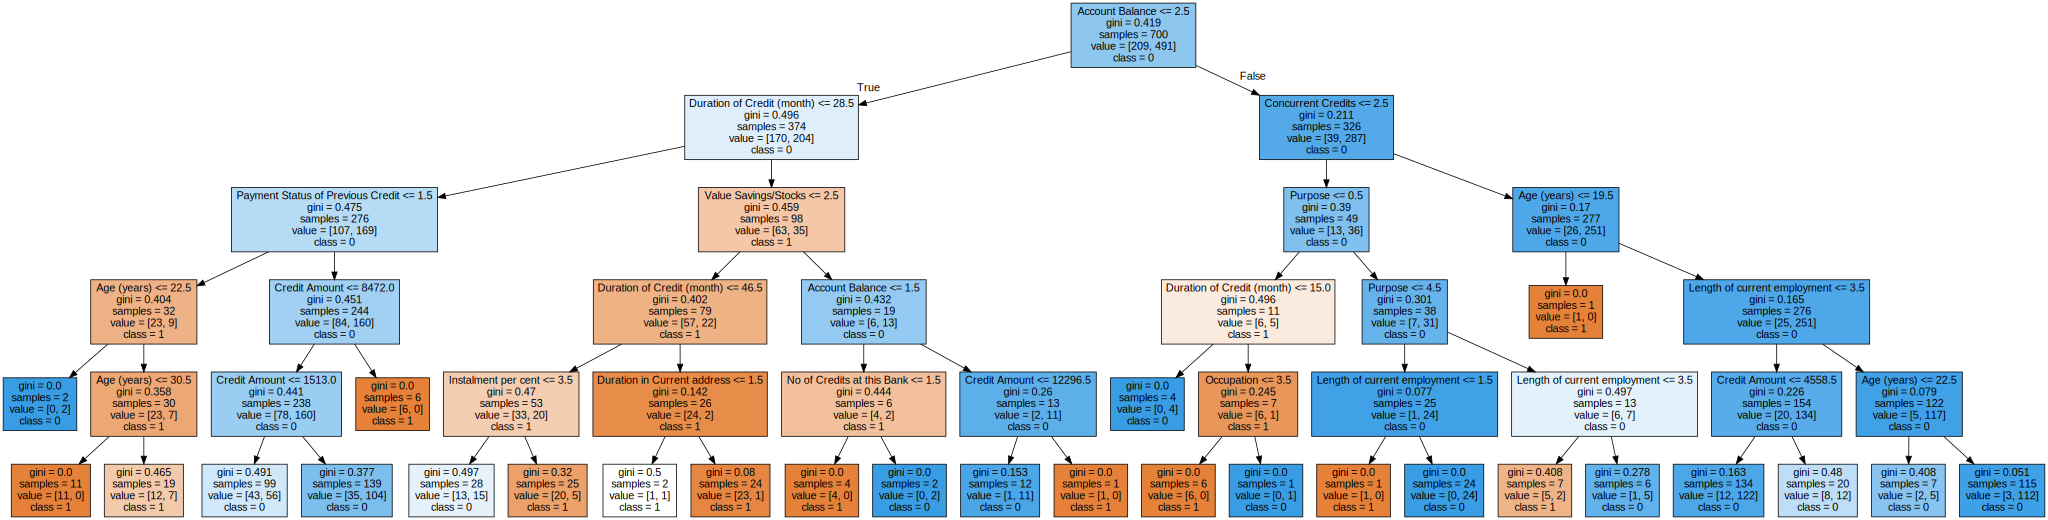

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph

# Prediction part of Desission Tree Algorithm

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  8 201]]
TP:  201 , FP:  62 , TN:  29 , FN: 8


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



# Using Dissision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
credit_risk_prediction_train=tree.predict(x_train)
credit_risk_prediction_test=tree.predict(x_test)
tree_mse=mean_squared_error(y_test,credit_risk_prediction_test)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.5354126134736337

# Applying Naive Bayes algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(x_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  20
Classes  ['0' '1']
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.66053824 -5.09289346 -7.52920224 -7.2442712  -0.02385625 -7.77176387
  -7.16792253 -7.18335493 -7.34322437 -8.16470272 -7.27277271 -7.3616411
  -4.77281549 -7.37473764 -7.66053824 -7.98653918 -7.23113472 -8.16470272
  -7.97617639 -8.28352364]
 [-6.96381256 -5.09018055 -7.03265538 -7.02592638 -0.03094527 -7.19521844
  -6.79713562 -6.95892257 -7.02443718 -7.89278845 -6.9965557  -7.21662871
  -4.4432513  -7.02816435 -7.36613136 -7.65976479 -6.96451308 -7.8874834
  -7.68825674 -7.98173594]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.39      0.41      0.40        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.63      0.63       300



# Using Gaussion Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
credit_risk_prediction_train = nb.predict(x_train)
credit_risk_prediction_test = nb.predict(x_test)

In [ ]:
acc_train=accuracy_score(y_train,credit_risk_prediction_train)
acc_test=accuracy_score(y_test,credit_risk_prediction_test)
acc_train,acc_test

(0.74, 0.7466666666666667)

# Modeling with selected attributes

## Data reduction (feature selection baced on correlation matrix)

Based on the correlation between attributes we can omit some attributes that have very low correlation to the class attribut and low effect on our prediction.

In [ ]:
df_reduct=df[['Creditability','Account Balance','Duration of Credit (month)','Credit Amount']]
df_reduct

,Creditability,Account Balance,Duration of Credit (month),Credit Amount
0,1,1,18.0,1049.0
1,1,1,9.0,2799.0
2,1,2,12.0,841.0
3,1,1,12.0,2122.0
4,1,1,12.0,2171.0
...,...,...,...,...
995,0,1,24.0,1987.0
996,0,1,24.0,2303.0
997,0,4,21.0,12680.0
998,0,2,12.0,6468.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set with Creditability as Our class column
class_col_name='Creditability'
feature_names=df_reduct.columns[df_reduct.columns != class_col_name ]
x_train, x_test, y_train, y_test = train_test_split(df_reduct.loc[:, feature_names], y, test_size=0.3,random_state=1)

# Applying Decision Tree algorithm

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


# Visualizing Desission Tree

class Names ['1' '0']


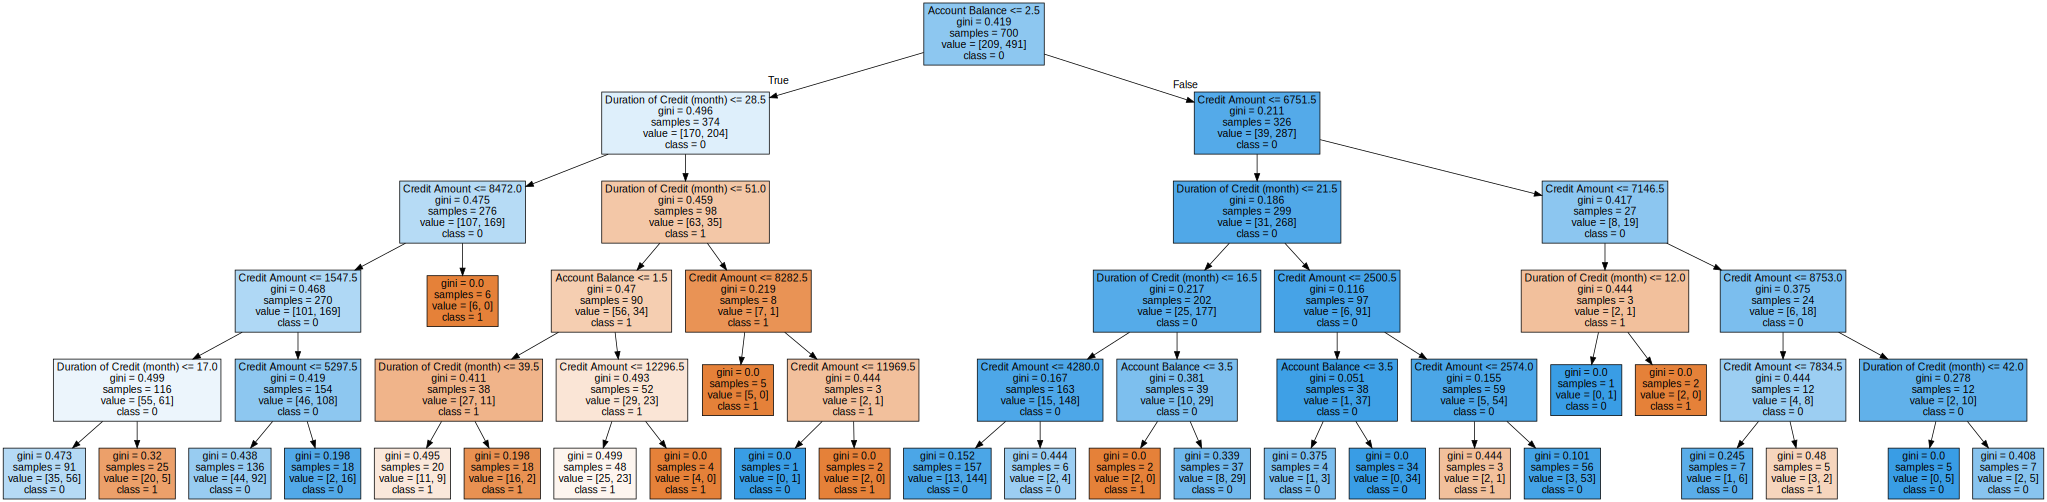

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df_reduct[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph

# Prediction part of Desission Tree Algorithm

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 30  61]
 [ 29 180]]
TP:  180 , FP:  61 , TN:  30 , FN: 29


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.33      0.40        91
           1       0.75      0.86      0.80       209

    accuracy                           0.70       300
   macro avg       0.63      0.60      0.60       300
weighted avg       0.67      0.70      0.68       300



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
credit_risk_prediction_train=tree.predict(x_train)
credit_risk_prediction_test=tree.predict(x_test)
tree_mse=mean_squared_error(y_test,credit_risk_prediction_test)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.5916079783099616

# Applying Naive Bayes algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(x_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  3
Classes  ['0' '1']
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.64343007e+00 -5.07578529e+00 -6.74807861e-03]
 [-6.94016620e+00 -5.06653420e+00 -7.29891260e-03]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.41      0.32      0.36        91
           1       0.73      0.80      0.77       209

    accuracy                           0.66       300
   macro avg       0.57      0.56      0.56       300
weighted avg       0.63      0.66      0.64       300



# Comparing two results of all attribultes modeling and selected attributes modeling

results?

#Categorical to One-Hot (numeric) Encoding

# Using Dissision Tree Regressor

our data is not categorical data. However weapply One-Hot encoding to see if we can get better reults or not.

In [ ]:
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
df_onehot

,Creditability,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,...,Most valuable available asset_1,Most valuable available asset_2,Most valuable available asset_3,Most valuable available asset_4,Concurrent Credits_1,Concurrent Credits_2,Concurrent Credits_3,Type of apartment_1,Type of apartment_2,Type of apartment_3
0,1,18.0,1049.0,4.0,21.0,1.0,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
1,1,9.0,2799.0,2.0,36.0,2.0,True,False,False,False,...,True,False,False,False,False,False,True,True,False,False
2,1,12.0,841.0,2.0,23.0,1.0,False,True,False,False,...,True,False,False,False,False,False,True,True,False,False
3,1,12.0,2122.0,3.0,39.0,2.0,True,False,False,False,...,True,False,False,False,False,False,True,True,False,False
4,1,12.0,2171.0,4.0,38.0,2.0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24.0,1987.0,2.0,21.0,1.0,True,False,False,False,...,True,False,False,False,False,False,True,True,False,False
996,0,24.0,2303.0,4.0,45.0,1.0,True,False,False,False,...,True,False,False,False,False,False,True,False,True,False
997,0,21.0,12680.0,4.0,30.0,1.0,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
998,0,12.0,6468.0,2.0,52.0,1.0,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False


In [ ]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
# class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  51
Classes  ['0' '1']
Number of records for classes  [205. 495.]
Log prior probability for classes  [-1.22807036 -0.34652257]
Log conditional probability for each feature given a class
 [[ -5.07581095  -0.0190791   -7.11242153  -4.7308263   -7.94782987
   -9.05366241  -9.29878487 -11.17755571 -10.04909046 -10.631012
  -10.57971871  -8.84806317 -10.53092855  -9.96453307  -9.46457712
  -11.09054433 -11.96601307  -9.86187892  -9.76878849 -12.4768387
  -11.37822641 -10.80286226 -12.8823038  -10.53092855  -8.55157046
  -10.57971871 -11.37822641 -11.78369151 -10.43995677 -10.74223764
   -9.72530338  -9.32695574 -10.24324647  -9.70424997 -10.74223764
   -9.16873174  -9.01110279 -10.93639365  -8.33370397 -11.09054433
  -11.62954084  -9.81425087  -9.68363069  -9.34134448  -9.70424997
   -9.93786482 -10.86740078  -8.53202587  -9.60515907  -8.74713725
  -10.1742536 ]
 [ -5.04752705  -0.02356594  -6.92847997  -4.41847875  -7.65799479
   -9.66863341  -9.39974384 -10.7154206

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 51  44]
 [ 60 145]]
TP:  145 , FP:  44 , TN:  51 , FN: 60


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.54      0.50        95
           1       0.77      0.71      0.74       205

    accuracy                           0.65       300
   macro avg       0.61      0.62      0.62       300
weighted avg       0.67      0.65      0.66       300



#Runing decision tree on one-hot encoded data

class Names ['1' '0']


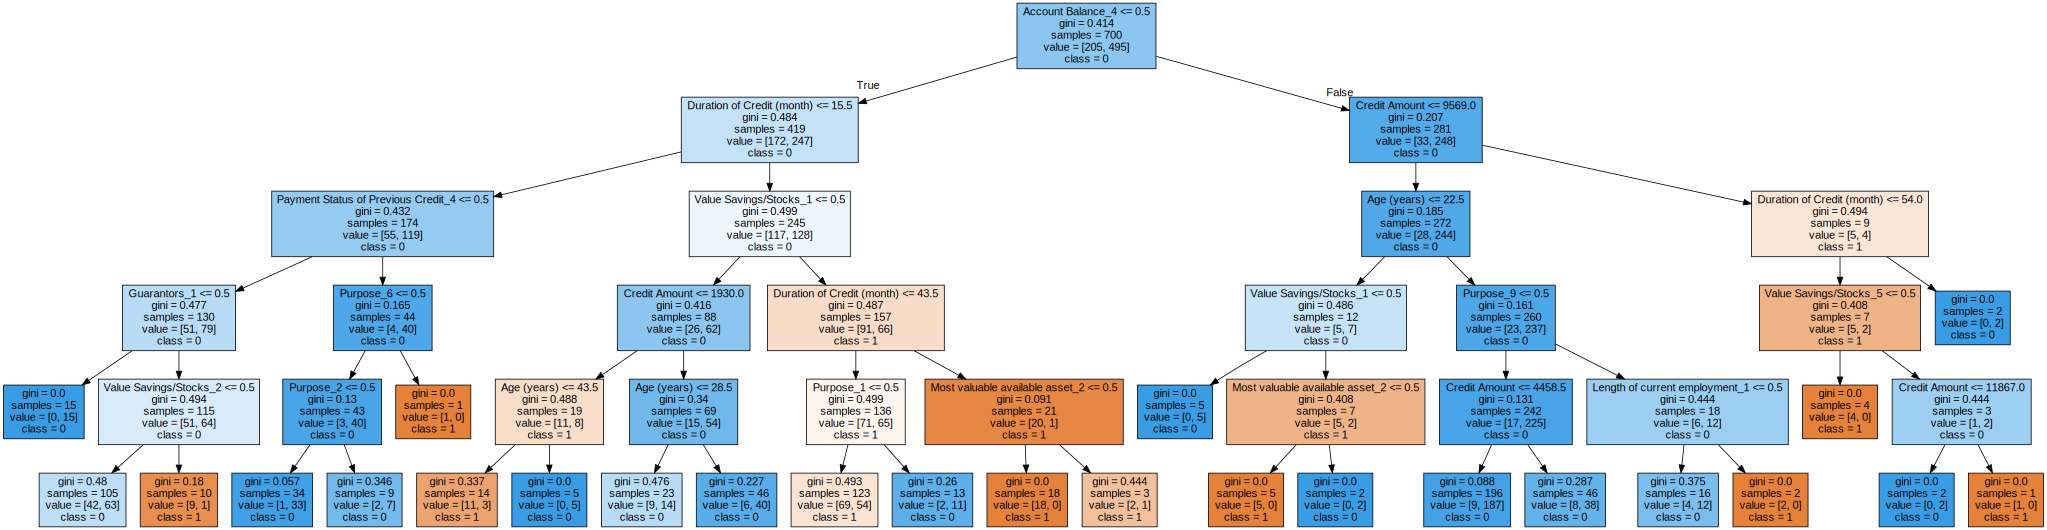

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=one_hot_feature_names,
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51        95
           1       0.77      0.81      0.79       205

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.70      0.71      0.70       300



In [ ]:
! pip install python-weka-wrapper3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 26.3 MB/s eta 0:00:00
  Created wheel for python-weka-wrapper3: filename=python_weka_wrapper3-0.3.1-py3-none-any.whl size=14493709 sha256=04afccdbb49481e56f6e7cc17e8dc13f32b007d55965edfc8a7c41c0e9422999
  Stored in directory: /root/.cache/pip/wheels/b6/e0/6f/1979fdd482decf4dd14f334b3d0e31fd7818b31f491ed7c21c
  Created wheel for configurable-objects: filename=configurable_objects-0.0.1-py3-none-any.whl size=4696 sha256=9e7db346d47653a5ef6906e5a5f53d6d4212eb3570744266d8229b13e31e5524
  Stored in directory: /root/.cache/pip/wheels/ef/11/bc/75ac8b0592c38dc42412942c37d3947faf0b222bad150132a1
  Created wheel for simple-data-flow: filename=simple_data_flow-0.0.1-py3-none-any.whl size=19058 sha2

In [ ]:
import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51        95
           1       0.77      0.81      0.79       205

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.70      0.71      0.70       300



In [ ]:
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


OSError: JVM cannot be restarted

In [ ]:
from weka.core.converters import Loader
from weka.core.classes import Random
from weka.classifiers import Classifier, Evaluation

In [ ]:
loader = Loader(classname="weka.core.converters.ArffLoader")
data_file = 'german_credit.arff'
#data_file="churn.arff"
#data_file="bank.arff"
data = loader.load_file(data_file)

print('Data set size: ', data.num_instances)

Data set size:  1000


In [ ]:
for i in range(data.num_attributes):
  print ("index ",i)
  print(data.attribute(i))

index  0
@attribute Creditability {0,1}
index  1
@attribute 'Account Balance' {1,2,3,4}
index  2
@attribute 'Duration of Credit (month)' numeric
index  3
@attribute 'Payment Status of Previous Credit' {0,1,2,3,4}
index  4
@attribute Purpose {0,1,2,3,4,5,6,8,9,10}
index  5
@attribute 'Credit Amount' numeric
index  6
@attribute 'Value Savings/Stocks' {1,2,3,4,5}
index  7
@attribute 'Length of current employment' {1,2,3,4,5}
index  8
@attribute 'Instalment per cent' numeric
index  9
@attribute 'Sex & Marital Status' {1,2,3,4}
index  10
@attribute Guarantors {1,2,3}
index  11
@attribute 'Duration in Current address' {1,2,3,4}
index  12
@attribute 'Most valuable available asset' {1,2,3,4}
index  13
@attribute 'Age (years)' numeric
index  14
@attribute 'Concurrent Credits' {1,2,3}
index  15
@attribute 'Type of apartment' {1,2,3}
index  16
@attribute 'No of Credits at this Bank' numeric
index  17
@attribute Occupation {1,2,3,4}
index  18
@attribute 'No of dependents' numeric
index  19
@attrib

In [ ]:
class_idx=0
print('Will be classifying on: ', data.attribute(class_idx))
data.class_index = class_idx


Will be classifying on:  @attribute Creditability {0,1}


In [ ]:
train, test = data.train_test_split(66.0, Random(1))

In [ ]:
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.25"])
cls.build_classifier(train)
# See the tree below.
print(cls)

J48 pruned tree
------------------

Account Balance = 1
|   Duration of Credit (month) <= 11
|   |   Payment Status of Previous Credit = 0: 1 (0.0)
|   |   Payment Status of Previous Credit = 1: 1 (0.0)
|   |   Payment Status of Previous Credit = 2
|   |   |   Instalment per cent <= 3: 1 (8.0/1.0)
|   |   |   Instalment per cent > 3: 0 (2.0)
|   |   Payment Status of Previous Credit = 3: 1 (0.0)
|   |   Payment Status of Previous Credit = 4: 1 (15.0)
|   Duration of Credit (month) > 11
|   |   Guarantors = 1
|   |   |   Occupation = 1: 0 (2.0)
|   |   |   Occupation = 2
|   |   |   |   Most valuable available asset = 1: 1 (8.0/2.0)
|   |   |   |   Most valuable available asset = 2: 1 (3.0)
|   |   |   |   Most valuable available asset = 3
|   |   |   |   |   Credit Amount <= 1797: 0 (5.0/1.0)
|   |   |   |   |   Credit Amount > 1797: 1 (4.0)
|   |   |   |   Most valuable available asset = 4: 0 (3.0)
|   |   |   Occupation = 3
|   |   |   |   Duration of Credit (month) <= 30
|   |   |  

In [ ]:
evl = Evaluation(train)
evl.test_model(cls, test)
print(evl.summary())


Correctly Classified Instances         246               72.3529 %
Incorrectly Classified Instances        94               27.6471 %
Kappa statistic                          0.3214
Mean absolute error                      0.3367
Root mean squared error                  0.4776
Relative absolute error                 78.156  %
Root relative squared error             99.5787 %
Total Number of Instances              340     



In [ ]:
print("Classes at different positions are ",data.attribute(class_idx))

print("confusion Matrix")
print(evl.confusion_matrix)
###############
# Print metrics for the first class
##############
class_position=0
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl.true_positive_rate(class_position))
print("FP",evl.false_positive_rate(class_position))
print("Precision ",evl.precision(class_position))
print("Recall ",evl.recall(class_position))
###############
# Print metrics for the second class
##############
class_position=1
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl.true_positive_rate(class_position))
print("FP",evl.false_positive_rate(class_position))
print("Precision ",evl.precision(class_position))
print("Recall ",evl.recall(class_position))


Classes at different positions are  @attribute Creditability {0,1}
confusion Matrix
[[ 46.  71.]
 [ 23. 200.]]

Evaluation from the perspective of class at position 0
TP  0.39316239316239315
FP 0.1031390134529148
Precision  0.6666666666666666
Recall  0.39316239316239315

Evaluation from the perspective of class at position 1
TP  0.8968609865470852
FP 0.6068376068376068
Precision  0.7380073800738007
Recall  0.8968609865470852


In [ ]:
nb = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
nb.build_classifier(train)
#let's understand the NB model by printing it
print(nb)

Naive Bayes Classifier

                                        Class
Attribute                                   0         1
                                       (0.28)    (0.72)
Account Balance
  1                                       83.0      98.0
  2                                       63.0     106.0
  3                                       10.0      33.0
  4                                       31.0     244.0
  [total]                                187.0     481.0

Duration of Credit (month)
  mean                                 24.2171   19.4318
  std. dev.                            13.1694   11.2681
  weight sum                               183       477
  precision                              1.931     1.931

Payment Status of Previous Credit
  0                                       16.0      14.0
  1                                       21.0      18.0
  2                                      107.0     238.0
  3                                       17.0      45.

Evaluation on the test set

In [ ]:
# Time for evaluation on the test set
evl_nb = Evaluation(train)
evl_nb.test_model(nb, test)
print(evl_nb.summary())


Correctly Classified Instances         255               75      %
Incorrectly Classified Instances        85               25      %
Kappa statistic                          0.3959
Mean absolute error                      0.2972
Root mean squared error                  0.4181
Relative absolute error                 68.9931 %
Root relative squared error             87.1731 %
Total Number of Instances              340     



In [ ]:
print("Classes at different positions are ",data.attribute(class_idx))
print("confusion Matrix")
#Note that the TP here will be for the class at the first position printed by the previous line
print(evl_nb.confusion_matrix)

###############
# Print metrics for the first class
##############
class_position=0
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl_nb.true_positive_rate(class_position))
print("FP",evl_nb.false_positive_rate(class_position))
print("Precision ",evl_nb.precision(class_position))
print("Recall ",evl_nb.recall(class_position))


###############
# Print metrics for the second class
##############
class_position=1
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl_nb.true_positive_rate(class_position))
print("FP",evl_nb.false_positive_rate(class_position))
print("Precision ",evl_nb.precision(class_position))
print("Recall ",evl_nb.recall(class_position))


Classes at different positions are  @attribute Creditability {0,1}
confusion Matrix
[[ 54.  63.]
 [ 22. 201.]]

Evaluation from the perspective of class at position 0
TP  0.46153846153846156
FP 0.09865470852017937
Precision  0.7105263157894737
Recall  0.46153846153846156

Evaluation from the perspective of class at position 1
TP  0.9013452914798207
FP 0.5384615384615384
Precision  0.7613636363636364
Recall  0.9013452914798207


In [ ]:
from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
search = ASSearch(classname="weka.attributeSelection.BestFirst", options=["-D", "1", "-N", "5"])
evaluator = ASEvaluation(classname="weka.attributeSelection.CfsSubsetEval", options=["-P", "1", "-E", "1"])
attsel = AttributeSelection()
attsel.search(search)
attsel.evaluator(evaluator)
attsel.select_attributes(data)

print("# attributes: " + str(attsel.number_attributes_selected))
print("attributes: " + str(attsel.selected_attributes))
print("result string:\n" + attsel.results_string)

# attributes: 3
attributes: [1. 2. 3. 0.]
result string:


=== Attribute Selection on all input data ===

Search Method:
	Best first.
	Start set: no attributes
	Search direction: forward
	Stale search after 5 node expansions
	Total number of subsets evaluated: 133
	Merit of best subset found:    0.076

Attribute Subset Evaluator (supervised, Class (nominal): 1 Creditability):
	CFS Subset Evaluator
	Including locally predictive attributes

Selected attributes: 2,3,4 : 3
                     Account Balance
                     Duration of Credit (month)
                     Payment Status of Previous Credit



As you see above, we only attributes 2,3 and 4 are important as judged by Weka for German Credit card data set. So we are going to load
data again and remove all the attributes from 5-21. Atrribute at index 1 is the class atrribute, so we'll keep that too

In [ ]:
from weka.filters import Filter

data2 = loader.load_file(data_file)
# Filtering method 1
remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "5-21"])
remove.inputformat(data2)
filtered_data = remove.filter(data2)

print(filtered_data.subset(row_range="1-10"))

@relation 'german_credit-weka.filters.unsupervised.attribute.Remove-R5-21-weka.filters.unsupervised.instance.RemoveRange-V-R1-10-weka.filters.MultiFilter-Fweka.filters.unsupervised.instance.RemoveRange -V -R 1-10-S1'

@attribute Creditability {0,1}
@attribute 'Account Balance' {1,2,3,4}
@attribute 'Duration of Credit (month)' numeric
@attribute 'Payment Status of Previous Credit' {0,1,2,3,4}

@data
1,1,18,4
1,1,9,4
1,2,12,2
1,1,12,4
1,1,12,4
1,1,10,4
1,1,8,4
1,1,6,4
1,4,18,4
1,2,24,2


Filtering method 2
Another way of filtering columns usingthe following code. Here we are keeping only features 1-4 and 7.

In [ ]:
filtered_data=data2.subset(col_range='1-4,7')
filtered_data

JVMNotRunning: Java Virtual Machine is not running

In [ ]:
jvm.stop()